In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from sklearn.model_selection import train_test_split as splitter
import cProfile
import pstats
import os
import sys
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib import dates as md

print("Librerie importate con successo")

Librerie importate con successo


In [2]:
data = pd.read_csv('../Datasets/kdd_prediction.csv', delimiter=',',
                       dtype={'protocol_type': str, 'service': str, 'flag': str, 'result': str})

print("Dataset importato con successo")

Dataset importato con successo


Total :  13451
Normal :  7500
Malicious :  5951


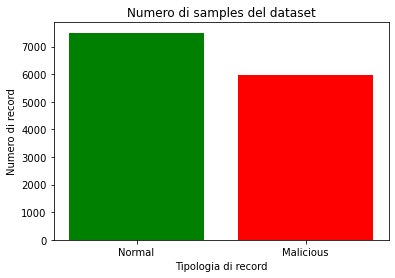

In [3]:
#Effettuo il plot del dataset

total_flows_count = data["result"].count()
normal_flows_count = len(data[data.result == "normal"])
anomaly_flows_count = len(data[data.result != "normal"])

print("Total : ",total_flows_count)
print("Normal : ",normal_flows_count)
print("Malicious : ",anomaly_flows_count)

# x-coordinates of left sides of bars  
left = [1, 1.5] 
  
# heights of bars 
height = [normal_flows_count, anomaly_flows_count] 
  
# labels for bars 
tick_label = ['Normal', 'Malicious'] 
  
# bar chart
plt.bar(left, height, tick_label = tick_label, 
        width = 0.4, color = ['green', 'red']) 
  
# Rinominazione asse x 
plt.xlabel('Tipologia di record') 
# Rinominazione asse y 
plt.ylabel('Numero di record') 
# Titolo
plt.title('Numero di samples del dataset') 
  
plt.show() 

In [4]:
def preprocessing(data):
    for column in data.columns:
        if data[column].dtype == type(object):
            le = LabelEncoder()
            data[column] = le.fit_transform(data[column])

In [5]:
preprocessing(data)

y = data.result
x = data.drop("result", axis=1)

profile = cProfile.Profile()
x_train, x_test, y_train, y_test = splitter(x, y, test_size=0.3, random_state=32)


In [6]:
num_train = len(x_train)
num_train_normal = 0

print("Il dataset per il train è composto da : ",num_train,"record")

for i in y_train:
    if(i == 1):
        num_train_normal = num_train_normal + 1
        
num_train_anomaly = num_train - num_train_normal

print("Il dataset per il train è composto da : ",num_train_anomaly,"anomalie")
print("Il dataset per il train è composto da : ",num_train_normal,"record normali")

Il dataset per il train è composto da :  9415 record
Il dataset per il train è composto da :  4186 anomalie
Il dataset per il train è composto da :  5229 record normali


In [7]:
num_test = len(x_test)
num_test_normal = 0

print("Il dataset per il test è composto da : ",num_test,"record")

for i in y_test:
    if(i == 1):
        num_test_normal = num_test_normal + 1
        
num_test_anomaly = num_test - num_test_normal

print("Il dataset per il test è composto da : ",num_test_anomaly,"anomalie")
print("Il dataset per il test è composto da : ",num_test_normal,"record normali")

Il dataset per il test è composto da :  4036 record
Il dataset per il test è composto da :  1765 anomalie
Il dataset per il test è composto da :  2271 record normali


In [8]:
profile.enable()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
val_indices = 200
x_val = x_train[-val_indices:]
y_val = y_train[-val_indices:]

In [9]:
model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=x_train.shape[1], kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              22528     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1

In [10]:
model.fit(x_train, y_train, epochs=15, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/15
19/19 [==============================] - 5s 265ms/step - loss: 7.5912 - accuracy: 0.4235 - val_loss: 5.1361 - val_accuracy: 0.3950
Epoch 2/15
19/19 [==============================] - 4s 230ms/step - loss: 4.7576 - accuracy: 0.5541 - val_loss: 3.7393 - val_accuracy: 0.5350
Epoch 3/15
19/19 [==============================] - 4s 224ms/step - loss: 3.3944 - accuracy: 0.6986 - val_loss: 2.6980 - val_accuracy: 0.8150
Epoch 4/15
19/19 [==============================] - 4s 232ms/step - loss: 2.5107 - accuracy: 0.8143 - val_loss: 2.0515 - val_accuracy: 0.8350
Epoch 5/15
19/19 [==============================] - 4s 231ms/step - loss: 1.7046 - accuracy: 0.8963 - val_loss: 1.5657 - val_accuracy: 0.9100
Epoch 6/15
19/19 [==============================] - 4s 223ms/step - loss: 1.2245 - accuracy: 0.9089 - val_loss: 0.9059 - val_accuracy: 0.9550
Epoch 7/15
19/19 [==============================] - 4s 222ms/step - loss: 0.9226 - accuracy: 0.9121 - val_loss: 1.1988 - val_accuracy: 0.8300
Epoch 

In [11]:
y_pred = model.predict(x_test)
profile.disable()
y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(y_test, axis=1)
profile.dump_stats('output.prof')
stream = open('result/keras_kdd_profiling.txt', 'w')
stats = pstats.Stats('output.prof', stream=stream)
stats.sort_stats('cumtime')
stats.print_stats()
os.remove('output.prof')

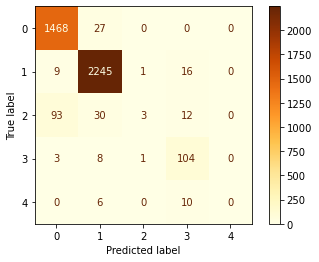

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1495
           1       0.97      0.99      0.98      2271
           2       0.60      0.02      0.04       138
           3       0.73      0.90      0.81       116
           4       0.00      0.00      0.00        16

    accuracy                           0.95      4036
   macro avg       0.65      0.58      0.56      4036
weighted avg       0.93      0.95      0.93      4036



C:\Users\39331\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

disp = disp.plot(cmap='YlOrBr')

plt.show()
print(classification_report(y_test, y_pred))